In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display

# Logistic Regression

## Definition

## Classification Problems (TRADUZIR)

Esquema genérico do classificar supervisionado - treinamento e predição

A figura a seguir ilustra o diagrama do classificador supervisionado multiclasse utilizando regressão logística e softmax.

Podemos identificar os blocos responsáveis pelo treinamento do classificador:
* $\boldsymbol{(Y,X)}$ são os dados rotulados
* $\boldsymbol{W}$, são os parâmetros a serem treinados
* Softmax é o que converte os scores de $\boldsymbol{XW}$ para probabilidades, gerando o $\hat{Y_{OH}}$
* O.H. converte o rótulo original em "one-hot"
* $J$ é a função perda que compara $ Y_{OH}$ e $\hat{Y_{OH}}$ a ser minimizada
* $\Delta_WJ$ é o gradiente que será utilizado para atualizar o $\boldsymbol{W}$ pelo método do gradiente descendente.

Os blocos responsáveis pela predição, uma vez que $\boldsymbol{W}$ já seja treinado:
* Softmax(XW) para calcular as probabilidades
* `Argmax` para escolher a classe de maior probabilidade

$$ Softmax(\boldsymbol{Z}) = \frac{e^{\boldsymbol{Z}}}{\sum_{j=0}^{k-1}e^{z_{i,j}}} $$

In [22]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def softmax(z):
    ez = np.array(np.exp(z))
    return ez/ez.sum(axis=1, keepdims=1)

### J: Função Perda pela Entropia Cruzada

A função a ser minimizada é a função $J$ de perda, que é baseada na Entropia Cruzada (*Cross Entropy*). Dado um conjunto de **amostras anotadas**, isto é, amostras $\boldsymbol{X}$ com
classe $\boldsymbol{Y}$, encontrar os pesos $\boldsymbol{W}$ que minimizam $J$:

$$ J_{\boldsymbol{X,Y}_{TRUE}}(\boldsymbol{W}) = -\frac{1}{n} \sum \boldsymbol{Y}_{TRUE} \odot \log{\boldsymbol{S}(\boldsymbol{XW})}$$
onde $\odot$ é multiplicação ponto-a-ponto de matrizes.

no caso, S tem a predicao (y_hat)

https://datascience.stackexchange.com/questions/20296/cross-entropy-loss-explanation

In [23]:
def _loss(y_hat, y):
    return (-1.0/y.shape[0]) * np.sum(y * np.log(y_hat))

### Minimização pelo gradiente descendente

A minimização é feita através do método de gradiente descendente. O gradiente de $J$ é dado por:

$$ \boldsymbol{\Delta J(W)} = - \frac{1}{n} \boldsymbol{X}^T (\boldsymbol{Y}_{TRUE} - \boldsymbol{S(XW)}) $$ 

Os pesos são então ajustados em cada *batch* pela equação onde $\eta$ é denominado de
taxa de aprendizagem: *learning rate*:

$$ \boldsymbol{W} = \boldsymbol{W} - \eta \boldsymbol{\Delta J(W)} $$ 

A cada iteração no programa de minimização abaixo, os pesos são ajustados aplicando-se o
gradiente descendente utilizando todo o conjunto de treinamento. Este esquema é denominado
de "batch gradient descent".

No programa a seguir, o $J$ é implementado pela variável `loss` e o gradiente $\Delta J$ 
é implementado pela variável `Grad`.

In [24]:
def cross_entropy_gradient(X, y, y_hat):
    return (-1.0/y.shape[0]) * (X.T).dot(y - y_hat)


def get_initial_guess(W, X, y):
    if W is None:
        W = np.zeros([X.shape[1], y.shape[1]])
    else:
        # check ig initial guess has a valid number of rows and columns
        if W.shape[0] != X.shape[1] or W.shape[1] != y.shape[1]:
            error_msg = "ERROR: INITIAL GUESS IS NOT THE RIGHT SHAPE.\nExpected(%s, %s) encountered (%s, %s)" % (X.shape[1],
                                                                                                                 y.shape[1],
                                                                                                                 W.shape[0],
                                                                                                                 W.shape[1])
            return error_msg
        else:
            return W
        
    return W

def train(X, y, eta=0.15, iterations=10000, W=None):
    
    # add the bias
    X['bias'] = 1
    
    #convert to numpy as pandas is crazy slow
    X = np.array(X)
    y = np.array(y)
    # y must be dummied, add check for that
    
    W = get_initial_guess(W, X, y)
#     W = np.array(W)
    losses = []
        
    for i in range(iterations):
        scores   = X.dot(W)
        y_hat    = softmax(scores)
        loss     = _loss(y_hat, y)
        gradient = cross_entropy_gradient(X, y, y_hat)
        W = W - (eta * gradient)
        losses.append(loss)
        
    return W, losses
    
    
        
    

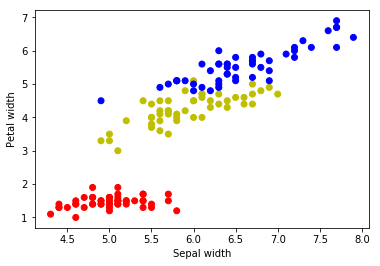

In [25]:
# testando no iris

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
Y = iris.target

X = pd.DataFrame(X, columns=['comprimento sepalas','comprimento petalas'])
y = pd.DataFrame(Y, columns=['Type'])
y['Type'] = y['Type'].astype(str)

colors = np.array(['r','y','b'])
plt.scatter(X['comprimento sepalas'], X['comprimento petalas'], c=colors[Y])
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.show()


Final W: [[ 4.11568419 -0.1245372  -3.99114698]
 [-7.09986225 -0.2228764   7.32273865]
 [ 1.52362071  5.61530031 -7.13892102]]
Final loss: 0.10747651928483509


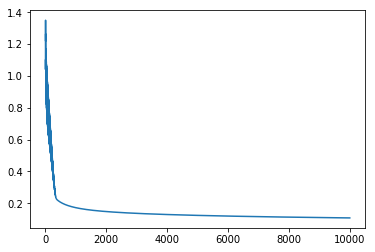

In [26]:
y = pd.get_dummies(y)

W, losses = train(X, y)

print("Final W:", W)
print("Final loss:", losses[-1])
plt.plot(losses)

In [27]:
def predict(X,W):
    S = softmax(X.dot(W))
    # escolhe a maior probabilidade entre as classes
    Y_hat = np.argmax(S,axis=1)
    return Y_hat

pd.crosstab(predict(X,W), Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,3,47


In [44]:
class LogisticRegression(object):
    """LogisticRegression classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Cost in every epoch.

    """
    def __init__(self, eta=0.01, iterations=1000):
        self.eta = eta
        self.iterations = iterations
        self.W = None    
    
    def train(self, X, y):
        
        """ Fit training data.

        Parameters
        ----------
        X : pandas DataFrame, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : pandas DataFrame, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """

        # Add the bias
        X['bias'] = 1
        
            
        #convert to numpy
        X = np.array(X)
        y = np.array(y)
       
        
        # make initial guess
        
        self.W = get_initial_guess(self.W, X, y)
        self.losses = []

        for i in range(self.iterations):
            scores   = X.dot(self.W)
            print(self.W)
            y_hat    = softmax(scores)
            loss     = _loss(y_hat, y)
            gradient = cross_entropy_gradient(X, y, y_hat)
            self.W = self.W - (self.eta * gradient)
            self.losses.append(loss)

        return self
    
    
    
    def _sigmoid(z):
        return 1/(1+np.exp(-z))

    def _softmax(z):
        if z.shape[1] > 1:
            ez = np.array(np.exp(z))
            return ez/ez.sum(axis=1, keepdims=1)
        else:
            return sigmoid(z)

    def _loss(self, y_hat, y):
        return (-1.0/y.shape[0]) * np.sum(y * np.log(y_hat))
    
    
    def cross_entropy_gradient(self, X, y, y_hat):
        return (-1.0/y.shape[0]) * (X.T).dot(y - y_hat)


    def set_initial_guess(self, X, y, W=None):
        if W is None:
            self.W = np.zeros([X.shape[1], y.shape[1]])
        else:
            # check if initial guess has a valid number of rows and columns
            if W.shape[0] != X.shape[1] or W.shape[1] != y.shape[1]:
                error_msg = "ERROR: INITIAL GUESS IS NOT THE RIGHT SHAPE.\nExpected(%s, %s) encountered (%s, %s)" % (X.shape[1],
                                                                                                                     y.shape[1],
                                                                                                                     W.shape[0],
                                                                                                                     W.shape[1])
                return error_msg
            else:
                self.W = W
                
    def predict(self,X):
        S = softmax(X.dot(self.W))
        # pick the highest probability class
        Y_hat = np.argmax(S,axis=1)
        return Y_hat
    
    

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[-4.18666667e-02  4.63333333e-03  3.72333333e-02]
 [-1.14800000e-01  2.51000000e-02  8.97000000e-02]
 [-3.17523785e-17  2.02060590e-17  2.35367281e-17]]
[[ 0.07686074  0.01255746 -0.08941819]
 [-0.11706516  0.05384167  0.06322349]
 [ 0.02658345  0.00038476 -0.02696821]]
[[ 0.03632731 -0.06891001  0.03258269]
 [-0.22038279  0.01533342  0.20504937]
 [ 0.02593661 -0.01356267 -0.01237394]]
[[ 0.15418813  0.07528821 -0.22947634]
 [-0.21528087  0.13710531  0.07817556]
 [ 0.05173473  0.00957413 -0.06130886]]
[[ 0.16015904 -0.19244235  0.0322833 ]
 [-0.27783079 -0.03589381  0.3137246 ]
 [ 0.05805459 -0.03489273 -0.02316186]]
[[ 0.23271598  0.05748531 -0.29020129]
 [-0.29022005  0.15223774  0.13798231]
 [ 0.07516089  0.00652962 -0.0816905 ]]
[[ 0.19171057 -0.17419305 -0.01751752]
 [-0.37662781 -0.00223529  0.3788631 ]
 [ 0.07296792 -0.0314411  -0.04152682]]
[[ 0.26976096  0.06246036 -0.33222132]
 [-0.38025579  0.17809569  0.2021601 ]
 [ 0.09062732  0.007627

[[ 1.91469036  0.35882501 -2.27351537]
 [-3.327237   -0.2030069   3.5302439 ]
 [ 0.6982146   0.52246712 -1.22068172]]
[[ 1.91608465  0.35894617 -2.27503081]
 [-3.32968953 -0.20305249  3.53274202]
 [ 0.69872982  0.52335039 -1.22208021]]
[[ 1.91747598  0.35907064 -2.27654662]
 [-3.33213644 -0.20309846  3.5352349 ]
 [ 0.69924392  0.52423427 -1.22347819]]
[[ 1.91886465  0.359194   -2.27805865]
 [-3.33457763 -0.20314816  3.53772579]
 [ 0.69975694  0.52511806 -1.224875  ]]
[[ 1.92025044  0.35932    -2.27957043]
 [-3.33701325 -0.20319868  3.54021193]
 [ 0.70026886  0.52600235 -1.2262712 ]]
[[ 1.92163356  0.35944541 -2.28107897]
 [-3.33944324 -0.20325245  3.54269569]
 [ 0.70077971  0.52688662 -1.22766633]]
[[ 1.92301385  0.35957295 -2.2825868 ]
 [-3.3418677  -0.20330737  3.54517507]
 [ 0.70128948  0.5277713  -1.22906078]]
[[ 1.92439148  0.35970029 -2.28409177]
 [-3.34428661 -0.20336517  3.54765177]
 [ 0.70179818  0.52865603 -1.23045421]]
[[ 1.92576633  0.35982938 -2.28559571]
 [-3.34670004 -0.

 [ 0.89734764  1.01374238 -1.91109002]]
[[ 2.46065875  0.43732175 -2.89798051]
 [-4.25663899 -0.30473511  4.5613741 ]
 [ 0.89759735  1.01455062 -1.91214797]]
[[ 2.4613441   0.43740702 -2.89875112]
 [-4.2577897  -0.30489281  4.56268251]
 [ 0.89784685  1.01535869 -1.91320554]]
[[ 2.46202886  0.43749209 -2.89952096]
 [-4.25893941 -0.30505033  4.56398974]
 [ 0.89809614  1.01616659 -1.91426273]]
[[ 2.46271303  0.43757697 -2.90029   ]
 [-4.26008813 -0.30520766  4.56529579]
 [ 0.89834522  1.01697432 -1.91531954]]
[[ 2.46339661  0.43766165 -2.90105826]
 [-4.26123586 -0.30536481  4.56660067]
 [ 0.89859408  1.01778188 -1.91637596]]
[[ 2.4640796   0.43774614 -2.90182574]
 [-4.2623826  -0.30552178  4.56790437]
 [ 0.89884273  1.01858927 -1.917432  ]]
[[ 2.464762    0.43783043 -2.90259243]
 [-4.26352835 -0.30567856  4.56920691]
 [ 0.89909116  1.01939649 -1.91848765]]
[[ 2.46544382  0.43791452 -2.90335834]
 [-4.26467311 -0.30583516  4.57050827]
 [ 0.89933939  1.02020354 -1.91954293]]
[[ 2.46612505  0

 [ 0.97363319  1.28622026 -2.25985345]]
[[ 2.66968234  0.45658081 -3.12626315]
 [-4.60780923 -0.34945308  4.95726231]
 [ 0.97382546  1.28697546 -2.26080092]]
[[ 2.67020798  0.4566096  -3.12681757]
 [-4.60869366 -0.3495542   4.95824786]
 [ 0.9740176   1.28773053 -2.26174813]]
[[ 2.67073326  0.45663825 -3.12737151]
 [-4.60957751 -0.34965518  4.95923269]
 [ 0.97420961  1.28848547 -2.26269508]]
[[ 2.67125818  0.45666677 -3.12792496]
 [-4.61046077 -0.34975603  4.9602168 ]
 [ 0.97440149  1.28924027 -2.26364176]]
[[ 2.67178276  0.45669517 -3.12847793]
 [-4.61134344 -0.34985673  4.96120018]
 [ 0.97459325  1.28999494 -2.26458819]]
[[ 2.67230698  0.45672343 -3.12903041]
 [-4.61222554 -0.3499573   4.96218284]
 [ 0.97478488  1.29074947 -2.26553435]]
[[ 2.67283085  0.45675156 -3.12958241]
 [-4.61310705 -0.35005774  4.96316478]
 [ 0.97497639  1.29150387 -2.26648026]]
[[ 2.67335437  0.45677957 -3.13013393]
 [-4.61398798 -0.35015803  4.96414601]
 [ 0.97516777  1.29225813 -2.2674259 ]]
[[ 2.67387753  0

 [ 1.0284977   1.51716126 -2.54565896]]
[[ 2.8193421   0.45993901 -3.27928111]
 [-4.86012263 -0.37510453  5.23522716]
 [ 1.02865683  1.51787813 -2.54653496]]
[[ 2.81977508  0.45993362 -3.2797087 ]
 [-4.86085427 -0.37516868  5.23602295]
 [ 1.02881587  1.51859489 -2.54741075]]
[[ 2.82020781  0.45992814 -3.28013595]
 [-4.8615855  -0.37523274  5.23681824]
 [ 1.02897482  1.51931153 -2.54828635]]
[[ 2.82064029  0.45992257 -3.28056287]
 [-4.86231633 -0.3752967   5.23761302]
 [ 1.02913368  1.52002807 -2.54916175]]
[[ 2.82107254  0.45991692 -3.28098945]
 [-4.86304675 -0.37536055  5.23840731]
 [ 1.02929245  1.5207445  -2.55003695]]
[[ 2.82150453  0.45991117 -3.2814157 ]
 [-4.86377677 -0.37542431  5.23920109]
 [ 1.02945114  1.52146081 -2.55091195]]
[[ 2.82193628  0.45990533 -3.28184162]
 [-4.86450639 -0.37548797  5.23999437]
 [ 1.02960974  1.52217702 -2.55178676]]
[[ 2.82236779  0.45989941 -3.2822672 ]
 [-4.86523561 -0.37555153  5.24078714]
 [ 1.02976825  1.52289311 -2.55266137]]
[[ 2.82279905  0

 [ 1.0897616   1.81525109 -2.90501269]]
[[ 2.98548185  0.45055722 -3.43603907]
 [-5.1417511  -0.39469876  5.53644985]
 [ 1.08989013  1.81592536 -2.90581549]]
[[ 2.98582912  0.45052123 -3.43635035]
 [-5.1423418  -0.39472837  5.53707017]
 [ 1.0900186   1.81659955 -2.90661815]]
[[ 2.98617623  0.45048518 -3.43666141]
 [-5.14293224 -0.39475792  5.53769016]
 [ 1.09014701  1.81727364 -2.90742065]]
[[ 2.98652318  0.45044907 -3.43697225]
 [-5.14352242 -0.39478741  5.53830982]
 [ 1.09027536  1.81794765 -2.90822301]]
[[ 2.98686996  0.45041291 -3.43728287]
 [-5.14411232 -0.39481683  5.53892915]
 [ 1.09040366  1.81862157 -2.90902522]]
[[ 2.98721658  0.4503767  -3.43759328]
 [-5.14470196 -0.39484619  5.53954815]
 [ 1.0905319   1.81929539 -2.90982729]]
[[ 2.98756304  0.45034042 -3.43790347]
 [-5.14529134 -0.39487549  5.54016682]
 [ 1.09066008  1.81996913 -2.91062921]]
[[ 2.98790934  0.4503041  -3.43821344]
 [-5.14588044 -0.39490472  5.54078516]
 [ 1.0907882   1.82064278 -2.91143098]]
[[ 2.98825548  0

[[ 3.13151365  0.42868178 -3.56019543]
 [-5.39100111 -0.40247045  5.79347156]
 [ 1.14411606  2.1204086  -3.26452466]]
[[ 3.13179824  0.42862531 -3.56042355]
 [-5.39148858 -0.40247601  5.79396459]
 [ 1.14422216  2.12104513 -3.26526729]]
[[ 3.13208271  0.42856881 -3.56065152]
 [-5.39197586 -0.40248153  5.79445739]
 [ 1.14432822  2.12168158 -3.2660098 ]]
[[ 3.13236707  0.42851227 -3.56087934]
 [-5.39246296 -0.40248701  5.79494997]
 [ 1.14443423  2.12231796 -3.26675219]]
[[ 3.13265132  0.4284557  -3.56110702]
 [-5.39294988 -0.40249244  5.79544232]
 [ 1.14454021  2.12295426 -3.26749447]]
[[ 3.13293545  0.4283991  -3.56133455]
 [-5.39343661 -0.40249784  5.79593445]
 [ 1.14464615  2.12359049 -3.26823664]]
[[ 3.13321948  0.42834246 -3.56156194]
 [-5.39392316 -0.40250319  5.79642635]
 [ 1.14475205  2.12422665 -3.26897869]]
[[ 3.13350339  0.42828579 -3.56178918]
 [-5.39440952 -0.4025085   5.79691803]
 [ 1.1448579   2.12486273 -3.26972063]]
[[ 3.13378719  0.42822908 -3.56201627]
 [-5.3948957  -0.

 [ 1.19262964  2.42936755 -3.6219972 ]]
[[ 3.26137243  0.39684468 -3.65821711]
 [-5.61417907 -0.40085501  6.01503408]
 [ 1.1927189   2.4299702  -3.6226891 ]]
[[ 3.26160987  0.39677494 -3.65838481]
 [-5.61458852 -0.40084425  6.01543276]
 [ 1.19280814  2.43057278 -3.62338092]]
[[ 3.26184724  0.39670517 -3.65855241]
 [-5.61499783 -0.40083345  6.01583129]
 [ 1.19289734  2.4311753  -3.62407264]]
[[ 3.26208452  0.39663539 -3.65871991]
 [-5.61540702 -0.40082264  6.01622965]
 [ 1.19298652  2.43177776 -3.62476428]]
[[ 3.26232173  0.39656559 -3.65888731]
 [-5.61581607 -0.40081179  6.01662786]
 [ 1.19307567  2.43238016 -3.62545582]]
[[ 3.26255885  0.39649576 -3.65905462]
 [-5.61622499 -0.40080092  6.01702592]
 [ 1.19316478  2.43298249 -3.62614727]]
[[ 3.2627959   0.39642592 -3.65922182]
 [-5.61663378 -0.40079003  6.01742381]
 [ 1.19325388  2.43358476 -3.62683863]]
[[ 3.26303287  0.39635605 -3.65938892]
 [-5.61704244 -0.40077911  6.01782155]
 [ 1.19334294  2.43418697 -3.6275299 ]]
[[ 3.26326976  0

[[ 3.37092885  0.35994656 -3.73087541]
 [-5.80362686 -0.3927669   6.19639376]
 [ 1.23404246  2.72323262 -3.95727509]]
[[ 3.37113214  0.35986913 -3.73100127]
 [-5.80397935 -0.39274605  6.1967254 ]
 [ 1.23411943  2.72380604 -3.95792548]]
[[ 3.37133536  0.35979169 -3.73112705]
 [-5.80433175 -0.39272518  6.19705693]
 [ 1.23419638  2.72437941 -3.95857579]]
[[ 3.37153853  0.35971423 -3.73125276]
 [-5.80468405 -0.3927043   6.19738835]
 [ 1.23427331  2.72495272 -3.95922603]]
[[ 3.37174165  0.35963676 -3.73137841]
 [-5.80503624 -0.3926834   6.19771965]
 [ 1.23435021  2.72552598 -3.95987619]]
[[ 3.3719447   0.35955928 -3.73150398]
 [-5.80538835 -0.39266249  6.19805083]
 [ 1.23442709  2.72609918 -3.96052627]]
[[ 3.37214769  0.35948179 -3.73162948]
 [-5.80574035 -0.39264156  6.19838191]
 [ 1.23450396  2.72667232 -3.96117628]]
[[ 3.37235062  0.35940429 -3.73175491]
 [-5.80609225 -0.39262061  6.19871287]
 [ 1.2345808   2.72724541 -3.96182621]]
[[ 3.3725535   0.35932678 -3.73188028]
 [-5.80644406 -0.

 [ 1.27003515  3.00284008 -4.27287523]]
[[ 3.46584711  0.32007667 -3.78592378]
 [-5.96857583 -0.3806924   6.34926823]
 [ 1.27010283  3.00338777 -4.2734906 ]]
[[ 3.46602459  0.31999509 -3.78601968]
 [-5.9688849  -0.38066549  6.34955039]
 [ 1.27017049  3.00393542 -4.27410591]]
[[ 3.46620202  0.31991351 -3.78611553]
 [-5.96919389 -0.38063857  6.34983246]
 [ 1.27023813  3.00448302 -4.27472115]]
[[ 3.46637941  0.31983192 -3.78621133]
 [-5.96950281 -0.38061164  6.35011445]
 [ 1.27030576  3.00503057 -4.27533633]]
[[ 3.46655675  0.31975032 -3.78630708]
 [-5.96981165 -0.3805847   6.35039635]
 [ 1.27037337  3.00557807 -4.27595144]]
[[ 3.46673405  0.31966872 -3.78640278]
 [-5.97012041 -0.38055775  6.35067816]
 [ 1.27044096  3.00612552 -4.27656649]]
[[ 3.46691131  0.31958712 -3.78649842]
 [-5.9704291  -0.38053079  6.35095989]
 [ 1.27050854  3.00667293 -4.27718147]]
[[ 3.46708851  0.31950551 -3.78659402]
 [-5.97073771 -0.38050382  6.35124154]
 [ 1.2705761   3.00722028 -4.27779639]]
[[ 3.46726568  0

[[ 3.54923145  0.27884657 -3.82807802]
 [-6.11401583 -0.36633926  6.48035508]
 [ 1.30198984  3.27081894 -4.57280878]]
[[ 3.54938894  0.27876321 -3.82815215]
 [-6.11429092 -0.36630901  6.48059992]
 [ 1.30205026  3.2713435  -4.57339376]]
[[ 3.54954639  0.27867985 -3.82822624]
 [-6.11456594 -0.36627875  6.48084469]
 [ 1.30211066  3.27186802 -4.57397868]]
[[ 3.54970381  0.27859649 -3.8283003 ]
 [-6.11484091 -0.36624849  6.4810894 ]
 [ 1.30217104  3.2723925  -4.57456354]]
[[ 3.54986119  0.27851312 -3.82837431]
 [-6.11511582 -0.36621822  6.48133404]
 [ 1.30223142  3.27291693 -4.57514835]]
[[ 3.55001854  0.27842976 -3.8284483 ]
 [-6.11539067 -0.36618795  6.48157862]
 [ 1.30229178  3.27344131 -4.5757331 ]]
[[ 3.55017585  0.27834639 -3.82852224]
 [-6.11566546 -0.36615767  6.48182313]
 [ 1.30235213  3.27396566 -4.57631779]]
[[ 3.55033312  0.27826302 -3.82859615]
 [-6.11594018 -0.36612739  6.48206758]
 [ 1.30241247  3.27448996 -4.57690242]]
[[ 3.55049036  0.27817965 -3.82867002]
 [-6.11621485 -0.

 [ 1.330644    3.52727071 -4.8579147 ]]
[[ 3.62386138  0.23706554 -3.86092692]
 [-6.24450344 -0.35077717  6.59528061]
 [ 1.33069863  3.52777428 -4.8584729 ]]
[[ 3.62400297  0.23698199 -3.86098496]
 [-6.2447512  -0.35074542  6.59549663]
 [ 1.33075325  3.52827781 -4.85903105]]
[[ 3.62414452  0.23689844 -3.86104296]
 [-6.24499891 -0.35071368  6.59571259]
 [ 1.33080785  3.5287813  -4.85958915]]
[[ 3.62428605  0.23681489 -3.86110094]
 [-6.24524657 -0.35068193  6.59592851]
 [ 1.33086245  3.52928475 -4.8601472 ]]
[[ 3.62442755  0.23673135 -3.8611589 ]
 [-6.24549419 -0.35065018  6.59614437]
 [ 1.33091704  3.52978816 -4.8607052 ]]
[[ 3.62456902  0.2366478  -3.86121682]
 [-6.24574175 -0.35061843  6.59636018]
 [ 1.33097161  3.53029153 -4.86126315]]
[[ 3.62471046  0.23656426 -3.86127472]
 [-6.24598926 -0.35058668  6.59657594]
 [ 1.33102618  3.53079486 -4.86182104]]
[[ 3.62485188  0.23648072 -3.86133259]
 [-6.24623673 -0.35055493  6.59679166]
 [ 1.33108073  3.53129815 -4.86237889]]
[[ 3.62499326  0

[[ 3.69120671  0.19556075 -3.88676746]
 [-6.3624015  -0.33483997  6.69724146]
 [ 1.35674294  3.77417283 -5.13091576]]
[[ 3.69133545  0.1954781  -3.88681355]
 [-6.36262694 -0.33480801  6.69743495]
 [ 1.35679285  3.77465709 -5.13144994]]
[[ 3.69146417  0.19539545 -3.88685962]
 [-6.36285235 -0.33477605  6.6976284 ]
 [ 1.35684276  3.77514131 -5.13198407]]
[[ 3.69159287  0.1953128  -3.88690567]
 [-6.36307771 -0.33474409  6.69782181]
 [ 1.35689265  3.77562549 -5.13251815]]
[[ 3.69172155  0.19523015 -3.8869517 ]
 [-6.36330304 -0.33471214  6.69801518]
 [ 1.35694254  3.77610964 -5.13305219]]
[[ 3.6918502   0.19514751 -3.88699771]
 [-6.36352832 -0.33468018  6.6982085 ]
 [ 1.35699242  3.77659375 -5.13358618]]
[[ 3.69197883  0.19506487 -3.8870437 ]
 [-6.36375357 -0.33464823  6.69840179]
 [ 1.35704229  3.77707783 -5.13412012]]
[[ 3.69210744  0.19498223 -3.88708967]
 [-6.36397877 -0.33461627  6.69859504]
 [ 1.35709216  3.77756187 -5.13465402]]
[[ 3.69223602  0.19489959 -3.88713562]
 [-6.36420393 -0.

 [ 1.38065242  4.01132371 -5.39197614]]
[[ 3.75285914  0.15461639 -3.90747553]
 [-6.47035102 -0.31899583  6.78934684]
 [ 1.38069845  4.01179015 -5.39248859]]
[[ 3.75297732  0.15453537 -3.90751269]
 [-6.47055788 -0.31896453  6.78952241]
 [ 1.38074447  4.01225654 -5.39300101]]
[[ 3.75309547  0.15445436 -3.90754983]
 [-6.47076472 -0.31893323  6.78969795]
 [ 1.38079048  4.0127229  -5.39351338]]
[[ 3.75321361  0.15437334 -3.90758695]
 [-6.47097151 -0.31890194  6.78987345]
 [ 1.38083649  4.01318923 -5.39402572]]
[[ 3.75333173  0.15429234 -3.90762406]
 [-6.47117828 -0.31887065  6.79004892]
 [ 1.38088249  4.01365552 -5.39453801]]
[[ 3.75344983  0.15421133 -3.90766116]
 [-6.47138501 -0.31883936  6.79022436]
 [ 1.38092848  4.01412178 -5.39505026]]
[[ 3.75356791  0.15413033 -3.90769824]
 [-6.4715917  -0.31880807  6.79039977]
 [ 1.38097446  4.01458801 -5.39556247]]
[[ 3.75368597  0.15404933 -3.9077353 ]
 [-6.47179836 -0.31877678  6.79057515]
 [ 1.38102044  4.0150542  -5.39607463]]
[[ 3.75380401  0

[[ 3.80957706  0.11469894 -3.924276  ]
 [-6.56958097 -0.30366957  6.87325054]
 [ 1.40282901  4.24034323 -5.64317224]]
[[ 3.80968645  0.11462004 -3.92430649]
 [-6.56977222 -0.30363953  6.87341174]
 [ 1.40287178  4.24079304 -5.64366481]]
[[ 3.80979582  0.11454115 -3.92433697]
 [-6.56996344 -0.30360948  6.87357292]
 [ 1.40291454  4.24124281 -5.64415735]]
[[ 3.80990518  0.11446226 -3.92436744]
 [-6.57015463 -0.30357944  6.87373406]
 [ 1.40295729  4.24169256 -5.64464984]]
[[ 3.81001453  0.11438337 -3.9243979 ]
 [-6.57034579 -0.3035494   6.87389519]
 [ 1.40300004  4.24214227 -5.6451423 ]]
[[ 3.81012385  0.11430449 -3.92442834]
 [-6.57053692 -0.30351936  6.87405628]
 [ 1.40304278  4.24259194 -5.64563472]]
[[ 3.81023316  0.11422561 -3.92445878]
 [-6.57072803 -0.30348933  6.87421735]
 [ 1.40308552  4.24304159 -5.64612711]]
[[ 3.81034246  0.11414674 -3.9244892 ]
 [-6.5709191  -0.3034593   6.8743784 ]
 [ 1.40312825  4.24349121 -5.64661945]]
[[ 3.81045174  0.11406787 -3.92451961]
 [-6.57111015 -0.

 [ 1.42346458  4.46089314 -5.88435772]]
[[ 3.86237027  0.07584747 -3.93821774]
 [-6.66179353 -0.2890409   6.95083443]
 [ 1.42350458  4.46132744 -5.88483203]]
[[ 3.86247224  0.07577101 -3.93824325]
 [-6.66197145 -0.28901249  6.95098393]
 [ 1.42354459  4.46176171 -5.8853063 ]]
[[ 3.8625742   0.07569455 -3.93826875]
 [-6.66214934 -0.28898408  6.95113342]
 [ 1.42358459  4.46219595 -5.88578054]]
[[ 3.86267615  0.0756181  -3.93829425]
 [-6.66232721 -0.28895567  6.95128288]
 [ 1.42362458  4.46263016 -5.88625474]]
[[ 3.86277808  0.07554166 -3.93831973]
 [-6.66250506 -0.28892727  6.95143233]
 [ 1.42366457  4.46306433 -5.88672891]]
[[ 3.86287999  0.07546522 -3.93834521]
 [-6.66268288 -0.28889887  6.95158175]
 [ 1.42370456  4.46349848 -5.88720304]]
[[ 3.8629819   0.07538878 -3.93837068]
 [-6.66286067 -0.28887048  6.95173115]
 [ 1.42374454  4.4639326  -5.88767714]]
[[ 3.86308379  0.07531235 -3.93839614]
 [-6.66303844 -0.28884209  6.95188053]
 [ 1.42378451  4.46436669 -5.8881512 ]]
[[ 3.86318566  0

[[ 3.91164302  0.03834086 -3.94998389]
 [-6.74765625 -0.27532124  7.02297749]
 [ 1.44286477  4.67436687 -6.11723164]]
[[ 3.91173869  0.03826702 -3.95000571]
 [-6.74782273 -0.2752947   7.02311743]
 [ 1.44290242  4.67478658 -6.117689  ]]
[[ 3.91183434  0.03819319 -3.95002753]
 [-6.74798918 -0.27526816  7.02325734]
 [ 1.44294006  4.67520627 -6.11814633]]
[[ 3.91192998  0.03811936 -3.95004934]
 [-6.74815561 -0.27524162  7.02339724]
 [ 1.44297769  4.67562594 -6.11860363]]
[[ 3.91202561  0.03804554 -3.95007115]
 [-6.74832202 -0.27521509  7.02353711]
 [ 1.44301533  4.67604557 -6.1190609 ]]
[[ 3.91212123  0.03797172 -3.95009295]
 [-6.74848841 -0.27518856  7.02367698]
 [ 1.44305296  4.67646518 -6.11951813]]
[[ 3.91221684  0.03789791 -3.95011474]
 [-6.74865478 -0.27516204  7.02381682]
 [ 1.44309058  4.67688475 -6.11997533]]
[[ 3.91231243  0.0378241  -3.95013653]
 [-6.74882113 -0.27513552  7.02395665]
 [ 1.4431282   4.6773043  -6.1204325 ]]
[[ 3.91240801  0.0377503  -3.95015831]
 [-6.74898745 -0.

 [ 1.46048901e+00  4.87305001e+00 -6.33353903e+00]]
[[ 3.95646005e+00  3.37908307e-03 -3.95983914e+00]
 [-6.82553253e+00 -2.62987576e-01  7.08852011e+00]
 [ 1.46052469e+00  4.87345652e+00 -6.33398121e+00]]
[[ 3.95655046e+00  3.30786678e-03 -3.95985833e+00]
 [-6.82568939e+00 -2.62962959e-01  7.08865235e+00]
 [ 1.46056036e+00  4.87386300e+00 -6.33442336e+00]]
[[ 3.95664086e+00  3.23665599e-03 -3.95987752e+00]
 [-6.82584623e+00 -2.62938347e-01  7.08878458e+00]
 [ 1.46059603e+00  4.87426945e+00 -6.33486548e+00]]
[[ 3.95673125e+00  3.16545068e-03 -3.95989670e+00]
 [-6.82600305e+00 -2.62913739e-01  7.08891679e+00]
 [ 1.46063170e+00  4.87467588e+00 -6.33530757e+00]]
[[ 3.95682163e+00  3.09425086e-03 -3.95991589e+00]
 [-6.82615985e+00 -2.62889134e-01  7.08904898e+00]
 [ 1.46066736e+00  4.87508228e+00 -6.33574963e+00]]
[[ 3.95691200e+00  3.02305652e-03 -3.95993506e+00]
 [-6.82631663e+00 -2.62864534e-01  7.08918116e+00]
 [ 1.46070302e+00  4.87548865e+00 -6.33619166e+00]]
[[ 3.95700236e+00  2.951

[[ 4.0019106  -0.03270655 -3.96920406]
 [-6.90424658 -0.25080656  7.15505314]
 [ 1.47848087  5.08011568 -6.55859655]]
[[ 4.00199612 -0.03277492 -3.9692212 ]
 [-6.90439441 -0.25078406  7.15517847]
 [ 1.4785147   5.08050876 -6.55902346]]
[[ 4.00208164 -0.03284329 -3.96923834]
 [-6.90454222 -0.25076157  7.15530379]
 [ 1.47854852  5.08090182 -6.55945034]]
[[ 4.00216714 -0.03291166 -3.96925548]
 [-6.90469002 -0.25073908  7.1554291 ]
 [ 1.47858235  5.08129485 -6.5598772 ]]
[[ 4.00225263 -0.03298001 -3.96927262]
 [-6.90483781 -0.25071659  7.1555544 ]
 [ 1.47861617  5.08168786 -6.56030402]]
[[ 4.00233812 -0.03304837 -3.96928975]
 [-6.90498557 -0.25069411  7.15567968]
 [ 1.47864998  5.08208084 -6.56073082]]
[[ 4.00242359 -0.03311671 -3.96930688]
 [-6.90513332 -0.25067163  7.15580496]
 [ 1.47868379  5.0824738  -6.56115759]]
[[ 4.00250906 -0.03318505 -3.96932401]
 [-6.90528106 -0.25064916  7.15593022]
 [ 1.4787176   5.08286673 -6.56158433]]
[[ 4.00259452 -0.03325339 -3.96934113]
 [-6.90542877 -0.

 [ 1.49496538  5.27319552 -6.76816091]]
[[ 4.04361824 -0.06621147 -3.97740677]
 [-6.97620921 -0.24006814  7.21627735]
 [ 1.49499765  5.2735764  -6.76857405]]
[[ 4.04369963 -0.06627711 -3.97742252]
 [-6.97634937 -0.24004769  7.21639705]
 [ 1.49502992  5.27395725 -6.76898717]]
[[ 4.04378101 -0.06634275 -3.97743826]
 [-6.97648951 -0.24002723  7.21651675]
 [ 1.49506219  5.27433807 -6.76940026]]
[[ 4.04386239 -0.06640839 -3.977454  ]
 [-6.97662965 -0.24000678  7.21663643]
 [ 1.49509445  5.27471887 -6.76981332]]
[[ 4.04394376 -0.06647402 -3.97746974]
 [-6.97676976 -0.23998634  7.2167561 ]
 [ 1.49512671  5.27509965 -6.77022636]]
[[ 4.04402512 -0.06653965 -3.97748547]
 [-6.97690987 -0.2399659   7.21687577]
 [ 1.49515896  5.2754804  -6.77063937]]
[[ 4.04410647 -0.06660526 -3.97750121]
 [-6.97704996 -0.23994546  7.21699542]
 [ 1.49519122  5.27586113 -6.77105235]]
[[ 4.04418782 -0.06667088 -3.97751694]
 [-6.97719003 -0.23992503  7.21711506]
 [ 1.49522347  5.27624184 -6.7714653 ]]
[[ 4.04426915 -0

[[ 4.0833094  -0.09830226 -3.98500715]
 [-7.04442644 -0.23035853  7.27478497]
 [ 1.51074931  5.46071533 -6.97146463]]
[[ 4.08338716 -0.09836524 -3.98502192]
 [-7.04455981 -0.23034006  7.27489987]
 [ 1.5107802   5.46108461 -6.97186481]]
[[ 4.08346491 -0.09842821 -3.9850367 ]
 [-7.04469317 -0.2303216   7.27501477]
 [ 1.51081109  5.46145388 -6.97226496]]
[[ 4.08354266 -0.09849118 -3.98505147]
 [-7.04482652 -0.23030314  7.27512966]
 [ 1.51084197  5.46182312 -6.97266509]]
[[ 4.08362039 -0.09855414 -3.98506625]
 [-7.04495986 -0.23028469  7.27524454]
 [ 1.51087285  5.46219234 -6.97306519]]
[[ 4.08369812 -0.0986171  -3.98508102]
 [-7.04509318 -0.23026623  7.27535941]
 [ 1.51090373  5.46256154 -6.97346527]]
[[ 4.08377585 -0.09868006 -3.98509579]
 [-7.04522649 -0.23024779  7.27547428]
 [ 1.51093461  5.46293071 -6.97386532]]
[[ 4.08385356 -0.09874301 -3.98511056]
 [-7.04535978 -0.23022935  7.27558913]
 [ 1.51096548  5.46329986 -6.97426535]]
[[ 4.08393127 -0.09880595 -3.98512533]
 [-7.04549307 -0.

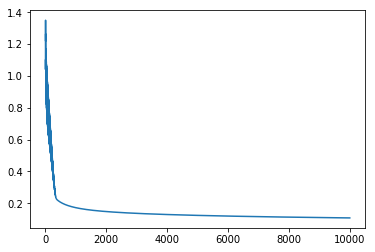

In [45]:
lr = LogisticRegression()
lr.eta = 0.15
lr.iterations = 10000
lr.train(X,y)
plt.plot(lr.losses)

In [36]:
pd.crosstab(predict(X,W), Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,3,47


In [12]:
lr = LogisticRegression()
lr.eta = 0.15
lr.iterations = 10000
lr.fit(X,y)
plt.plot(lr.losses)

IndexError: tuple index out of range

In [41]:
X.shape

(150, 3)

In [42]:
y.shape

(150, 3)

In [43]:
X

,comprimento sepalas,comprimento petalas,bias
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
5,5.4,1.7,1
6,4.6,1.4,1
7,5.0,1.5,1
8,4.4,1.4,1
9,4.9,1.5,1
